In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b49cf2fb4f1f184eaed74564b815921d7d7c5f9f783819527cdd1dc51d2d499c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


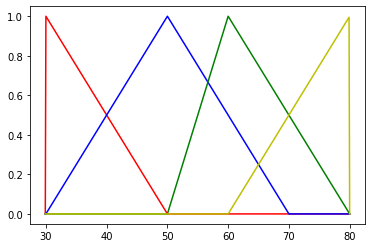

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(29.9,80.1,0.1)

#trimf
slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,50,70])
medium_fast = fuzz.trimf(x,[50,60,80])
full_speed = fuzz.trimf(x,[60,80,80])

plt.figure()

plt.plot(x,slow,'r',linewidth = 1.5, label = 'slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'medium')
plt.plot(x,medium_fast,'g',linewidth = 1.5, label = 'medium_fast')
plt.plot(x,full_speed,'y',linewidth = 1.5, label = 'full_speed')

plt.show()

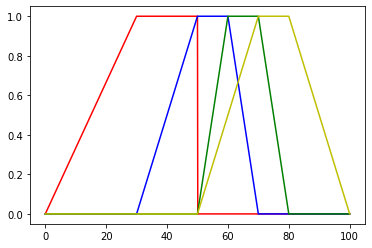

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(0,100.1,0.1)

#trapmf
slow = fuzz.trapmf(x,[0,30,50,50])
medium = fuzz.trapmf(x,[30,50,60,70])
medium_fast = fuzz.trapmf(x,[50,60,70,80])
full_speed = fuzz.trapmf(x,[50,70,80,100])

plt.figure()

plt.plot(x,slow,'r',linewidth = 1.5, label = 'slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'medium')
plt.plot(x,medium_fast,'g',linewidth = 1.5, label = 'medium_fast')
plt.plot(x,full_speed,'y',linewidth = 1.5, label = 'full_speed')

plt.show()

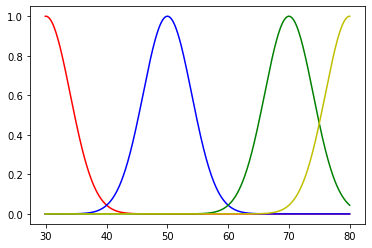

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(29.9,80.1,0.1)

#gaussmf
slow = fuzz.gaussmf(x,30,4)
medium = fuzz.gaussmf(x,50,4)
medium_fast = fuzz.gaussmf(x,70,4)
full_speed = fuzz.gaussmf(x,80,4)

plt.figure()

plt.plot(x,slow,'r',linewidth = 1.5, label = 'slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'medium')
plt.plot(x,medium_fast,'g',linewidth = 1.5, label = 'medium_fast')
plt.plot(x,full_speed,'y',linewidth = 1.5, label = 'full_speed')

plt.show()


Percent: 18.5326


'\nfood.view()\nservice.view()\ntip.view()\n'

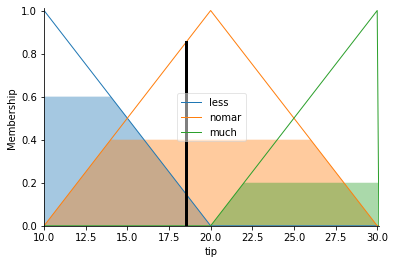

In [ ]:
#Controller Smart Restaurant

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control  as ctrl

food = ctrl.Antecedent(np.arange(0,10.2,0.1),'food') # 'Antecedent': the cause or origin of something existing or happening later.
service = ctrl.Antecedent(np.arange(0,10.2,0.1),'service') 
tip = ctrl.Consequent(np.arange(10,30.2,0.1),'tip') # 'Consequent': happening as a result of something.

#Quality of Food - Trimf
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

#Quality of Service - Trimf
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

#Money for Tip - Trimf
tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['nomar'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

#Rule for controller
rule1 = ctrl.Rule(food['poor']& service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor']& service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor']& service['good'], tip['much'])
rule4 = ctrl.Rule(food['average']& service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average']& service['average'], tip['nomar'])
rule6 = ctrl.Rule(food['average']& service['good'], tip['much'])
rule7 = ctrl.Rule(food['good']& service['poor'], tip['less'])
rule8 = ctrl.Rule(food['good']& service['average'], tip['much'])
rule9 = ctrl.Rule(food['good']& service['good'], tip['much'])

#learning code for controller
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 2
tipping.input['service'] = 6

#print in capture
tipping.compute()
print('Percent:',round(tipping.output['tip'],4))
tip.view(sim = tipping)


'''
food['poor'].view()
food['average'].view()
food['good'].view()
'''
'''
food.view()
service.view()
tip.view()
'''

Percent Power: 6.6667


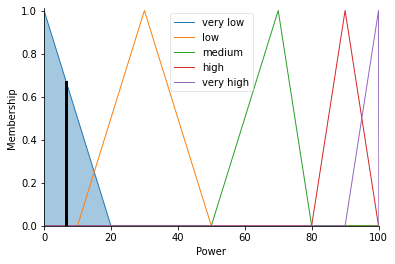

In [ ]:
#Controller Smart Electric Cooker

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control  as ctrl

#range for program
time = ctrl.Antecedent(np.arange(10,180.2,0.1),'time') # 'Antecedent': the cause or origin of something existing or happening later.
rice = ctrl.Antecedent(np.arange(200,2000.2,0.1),'rice') 
power = ctrl.Consequent(np.arange(0,100.2,0.1),'Power') # 'Consequent': happening as a result of something.

#time of cooker - Trimf
time['very fast'] = fuzz.trimf(time.universe,[10,10,15])
time['fast'] = fuzz.trimf(time.universe,[15,20,25])
time['average'] = fuzz.trimf(time.universe,[20,30,60])
time['slow'] = fuzz.trimf(time.universe,[25,60,90])
time['very slow'] = fuzz.trimf(time.universe,[90,180,180])

#rice for cooker - Trimf
rice['very less'] = fuzz.trimf(rice.universe,[200,200,300])
rice['less'] = fuzz.trimf(rice.universe,[200,200,400])
rice['nomar'] = fuzz.trimf(rice.universe,[300,500,700])
rice['much'] = fuzz.trimf(rice.universe,[600,900,1000])
rice['very much'] = fuzz.trimf(rice.universe,[1000,2000,2000])

#Money for Tip - Trimf
power['very low'] = fuzz.trimf(power.universe,[0,0,20])
power['low'] = fuzz.trimf(power.universe,[10,30,50])
power['medium'] = fuzz.trimf(power.universe,[50,70,80])
power['high'] = fuzz.trimf(power.universe,[80,90,100])
power['very high'] = fuzz.trimf(power.universe,[90,100,100])

#Rule for controller
rule1 = ctrl.Rule(time['very fast']& rice['very less'], power['very low'])
rule2 = ctrl.Rule(time['very fast']& rice['less'], power['very low'])
rule3 = ctrl.Rule(time['very fast']& rice['nomar'], power['medium'])
rule4 = ctrl.Rule(time['very fast']& rice['much'], power['very high'])
rule5 = ctrl.Rule(time['very fast']& rice['very much'], power['very high'])

rule6 = ctrl.Rule(time['fast']& rice['very less'], power['very low'])
rule7 = ctrl.Rule(time['fast']& rice['less'], power['low'])
rule8 = ctrl.Rule(time['fast']& rice['nomar'], power['medium'])
rule9 = ctrl.Rule(time['fast']& rice['much'], power['high'])
rule10 = ctrl.Rule(time['fast']& rice['very much'], power['very high'])

rule11 = ctrl.Rule(time['average']& rice['very less'], power['low'])
rule12 = ctrl.Rule(time['average']& rice['less'], power['low'])
rule13 = ctrl.Rule(time['average']& rice['nomar'], power['medium'])
rule14 = ctrl.Rule(time['average']& rice['much'], power['high'])
rule15 = ctrl.Rule(time['average']& rice['very much'], power['very high'])

rule16 = ctrl.Rule(time['slow']& rice['very less'], power['low'])
rule17 = ctrl.Rule(time['slow']& rice['less'], power['low'])
rule18 = ctrl.Rule(time['slow']& rice['nomar'], power['low'])
rule19 = ctrl.Rule(time['slow']& rice['much'], power['low'])
rule20 = ctrl.Rule(time['slow']& rice['very much'], power['low'])

rule21 = ctrl.Rule(time['very slow']& rice['very less'], power['very low'])
rule22 = ctrl.Rule(time['very slow']& rice['less'], power['very low'])
rule23 = ctrl.Rule(time['very slow']& rice['nomar'], power['very low'])
rule24 = ctrl.Rule(time['very slow']& rice['much'], power['very low'])
rule25 = ctrl.Rule(time['very slow']& rice['very much'], power['very low'])

#learning code for controller
powerring_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,
                                   rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,
                                   rule21,rule22,rule23,rule24,rule25])
powerring = ctrl.ControlSystemSimulation(powerring_ctrl)
powerring.input['time'] = 180  #input must: 10÷180
powerring.input['rice'] = 200 #input must: 200÷2000

#print in capture
powerring.compute()
print('Percent Power:',round(powerring.output['Power'],4))
power.view(sim = powerring)